In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow --quiet

In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Read in the HPG dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv")
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

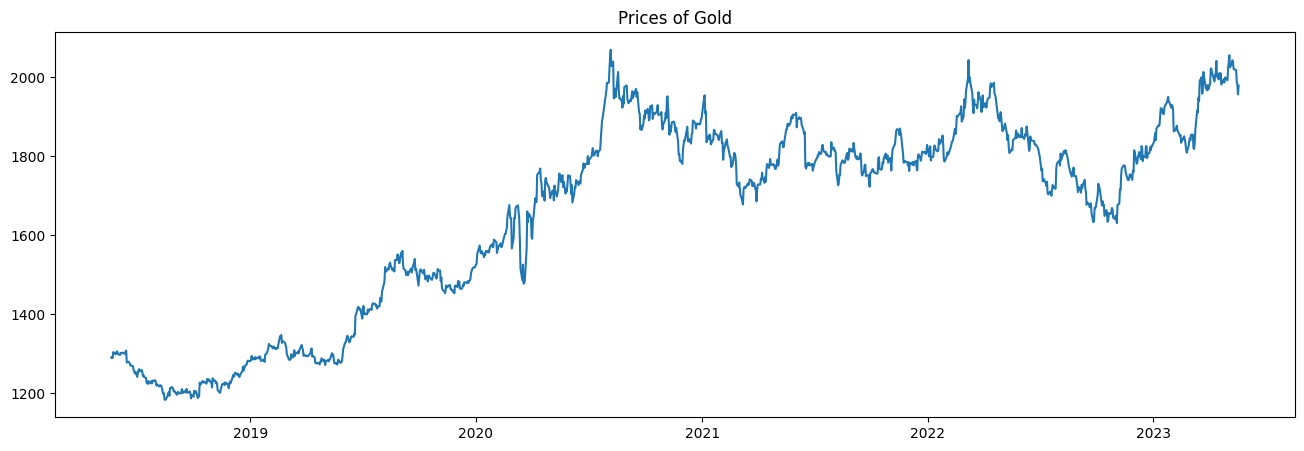

In [5]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Gold')
plt.show()

In [6]:
# Convert the 'df1' DataFrame to a NumPy array
data = df1.values

# Split the data
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
# Create a MinMaxScaler object with a specified range
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

In [8]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [9]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [10]:
# Build the model
model = Sequential()

model.add(SimpleRNN(50, input_shape=(5, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Add an LSTM layer with 128 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
# model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1), return_sequences=True,kernel_regularizer=l2(0.01)))

# # Add an LSTM layer with 64 units
# model.add(LSTM(units=64, return_sequences=True))

# # Add an LSTM layer with 64 units
# model.add(LSTM(units=64, return_sequences=False))

# # Add a dropout layer with a rate of 0.5
# model.add(Dropout(0.5))

# # Add a dense layer with 1 unit
# model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.17666, saving model to save_model.hdf5
19/19 - 1s - loss: 0.1767 - 931ms/epoch - 49ms/step
Epoch 2/80

Epoch 2: loss improved from 0.17666 to 0.04549, saving model to save_model.hdf5
19/19 - 0s - loss: 0.0455 - 45ms/epoch - 2ms/step
Epoch 3/80

Epoch 3: loss improved from 0.04549 to 0.03504, saving model to save_model.hdf5
19/19 - 0s - loss: 0.0350 - 43ms/epoch - 2ms/step
Epoch 4/80

Epoch 4: loss improved from 0.03504 to 0.02792, saving model to save_model.hdf5
19/19 - 0s - loss: 0.0279 - 49ms/epoch - 3ms/step
Epoch 5/80

Epoch 5: loss improved from 0.02792 to 0.02740, saving model to save_model.hdf5
19/19 - 0s - loss: 0.0274 - 44ms/epoch - 2ms/step
Epoch 6/80

Epoch 6: loss improved from 0.02740 to 0.02518, saving model to save_model.hdf5
19/19 - 0s - loss: 0.0252 - 43ms/epoch - 2ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.02518
19/19 - 0s - loss: 0.0276 - 33ms/epoch - 2ms/step
Epoch 8/80

Epoch 8: loss improved from 0.025

In [11]:
 y_pred_test = model.predict(test_data, verbose=0)

In [12]:
sc_train.shape

(1296, 1)

In [13]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[1291:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

(1, 5)


In [14]:
# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

[0.9419471425344477, 0.9085159250056472, 0.8998192907160605, 0.8724870115202168, 0.8975604246668172]


In [15]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 31):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps,1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9017836451530457], [0.9091733694076538], [0.916372537612915], [0.9193398356437683], [0.9249760508537292], [0.9295926690101624], [0.934442937374115], [0.9394481778144836], [0.9440962076187134], [0.9488055109977722], [0.9533678889274597], [0.9578496217727661], [0.9622708559036255], [0.9665942192077637], [0.9708455204963684], [0.975012481212616], [0.9790970683097839], [0.9831019639968872], [0.9870248436927795], [0.9908679127693176], [0.9946308135986328], [0.9983139038085938], [1.001918077468872], [1.0054439306259155], [1.0088920593261719], [1.0122634172439575], [1.0155584812164307], [1.0187782049179077], [1.021923303604126], [1.0249948501586914], [1.0279935598373413]]


In [16]:
import datetime as dt

# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=31, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1982.43923942]
 [1988.98210127]
 [1995.3562448 ]
 [1997.98349048]
 [2002.97379543]
 [2007.06134914]
 [2011.35577675]
 [2015.78741664]
 [2019.90278223]
 [2024.07239944]
 [2028.11192886]
 [2032.08005512]
 [2035.99461582]
 [2039.82252169]
 [2043.58662385]
 [2047.27605087]
 [2050.89254428]
 [2054.43847892]
 [2057.91179661]
 [2061.31444997]
 [2064.64612236]
 [2067.90713043]
 [2071.09826579]
 [2074.22005618]
 [2077.27302933]
 [2080.25802963]
 [2083.17547927]
 [2086.02622263]
 [2088.81089301]
 [2091.53044033]
 [2094.18549788]]


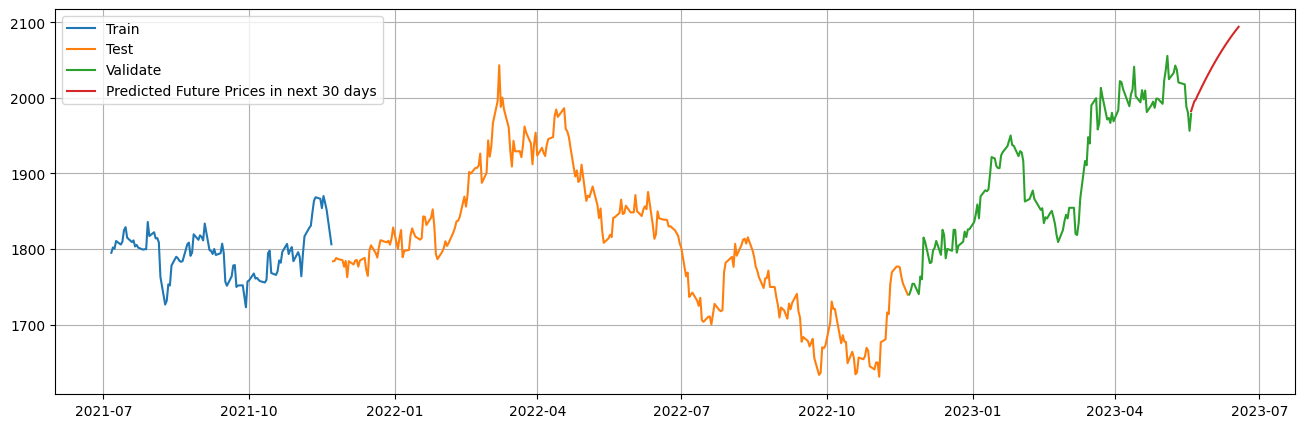

In [18]:
# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:], label='Train')
plt.plot(test_data, label='Test')
plt.plot()
plt.plot(val_data, label='Validate')
plt.plot(PREDICTIONS_FUTURE, label='Predicted Future Prices in next 30 days')

# # Add a vertical line at the start of the future predictions
# plt.axvline(x=min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

# Add a legend and grid
plt.legend()
plt.grid()

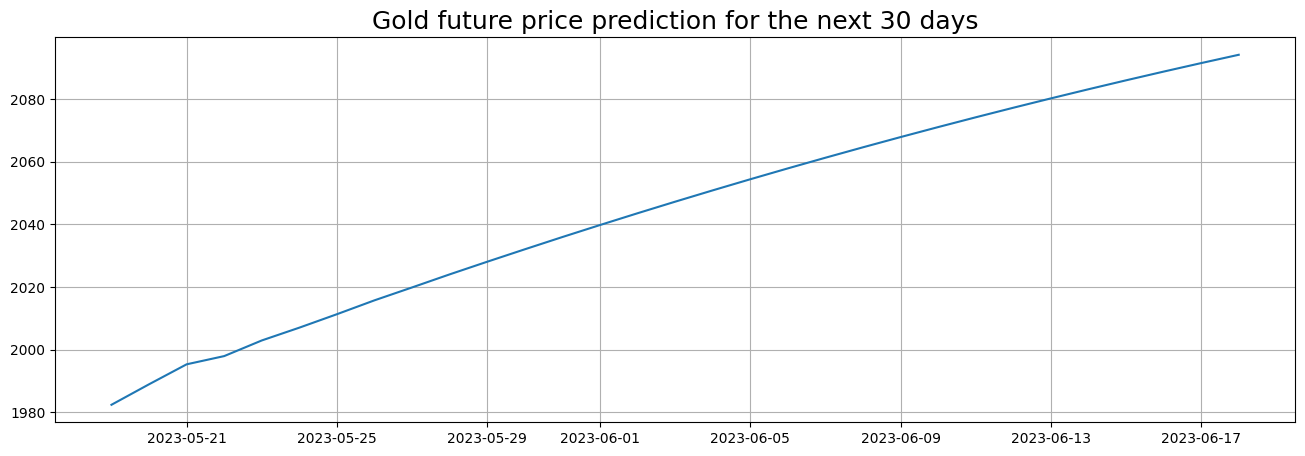

In [19]:
# Set the figure size and create a subplot
plt.figure(figsize=(16,5))
plt.plot(PREDICTIONS_FUTURE)
# Add a legend and grid
plt.title('Gold future price prediction for the next 30 days',fontsize=18)
plt.grid()

In [20]:
print(PREDICTIONS_FUTURE)

                  price
2023-05-19  1982.439239
2023-05-20  1988.982101
2023-05-21  1995.356245
2023-05-22  1997.983490
2023-05-23  2002.973795
2023-05-24  2007.061349
2023-05-25  2011.355777
2023-05-26  2015.787417
2023-05-27  2019.902782
2023-05-28  2024.072399
2023-05-29  2028.111929
2023-05-30  2032.080055
2023-05-31  2035.994616
2023-06-01  2039.822522
2023-06-02  2043.586624
2023-06-03  2047.276051
2023-06-04  2050.892544
2023-06-05  2054.438479
2023-06-06  2057.911797
2023-06-07  2061.314450
2023-06-08  2064.646122
2023-06-09  2067.907130
2023-06-10  2071.098266
2023-06-11  2074.220056
2023-06-12  2077.273029
2023-06-13  2080.258030
2023-06-14  2083.175479
2023-06-15  2086.026223
2023-06-16  2088.810893
2023-06-17  2091.530440
2023-06-18  2094.185498
